In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/Users/macbook/Desktop/us medical insurance costs/insurance.csv'
data = pd.read_csv(file_path)
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [48]:
gender_cost_analysis = data.groupby('sex')['charges'].agg(['mean', 'median', 'count']).reset_index()
print("The gender cost analysis is:")
print(gender_cost_analysis)

children_cost_analysis = data.groupby('children')['charges'].agg(['mean', 'median', 'count']).reset_index()
print("The children cost analysis is:")
print(children_cost_analysis)

average_age = data['age'].mean()
print("The average age is:", average_age)


The gender cost analysis is:
      sex          mean      median  count       first        last
0  female  12569.578844  9412.96250    662  16884.9240  29141.3603
1    male  13956.751178  9369.61575    676   1725.5523  10600.5483
The children cost analysis is:
   children          mean       median  count
0         0  12365.975602   9856.95190    574
1         1  12731.171832   8483.87015    324
2         2  15073.563734   9264.97915    240
3         3  15355.318367  10600.54830    157
4         4  13850.656311  11033.66170     25
5         5   8786.035247   8589.56505     18
The average age is: 39.20702541106129


In [13]:
num_patients = len(data)
print(f"Total number of patients: {num_patients}")

children_count_combined = data['children'].replace([4, 5], 3).value_counts().sort_index()
print("Sum of people with different numbers of children (with 3+ group):")
print(children_count_combined)


smoker_counts = data['smoker'].value_counts(normalize=True) * 100
print("Percentage of smokers and non-smokers:")
print(smoker_counts)

region_counts = data['region'].value_counts()
print("Distribution by regions:")
print(region_counts)

highest_charge_patient = data.loc[data['charges'].idxmax()]
print("Patient with the highest charges:")
print(highest_charge_patient)

Total number of patients: 1338
Sum of people with different numbers of children (with 3+ group):
children
0    574
1    324
2    240
3    200
Name: count, dtype: int64
Percentage of smokers and non-smokers:
smoker
no     79.521674
yes    20.478326
Name: proportion, dtype: float64
Distribution by regions:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
Patient with the highest charges:
age                  54
sex              female
bmi               47.41
children              0
smoker              yes
region        southeast
charges     63770.42801
Name: 543, dtype: object


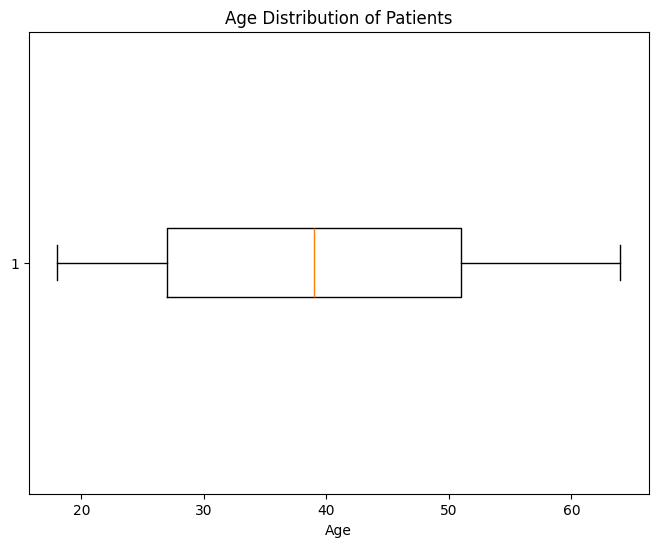

In [9]:
#box plot for age distribution
plt.figure(figsize=(8, 6))
plt.boxplot(data['age'], vert=False)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.show()

In [23]:
#one-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

#calculate the correlation matrix for all numeric columns, including encoded variables
correlation_matrix_encoded = data_encoded.corr()

#remove the 'charges' factor and display the correlation of each factor with 'charges'
correlation_without_charges = correlation_matrix_encoded['charges'].drop('charges').sort_values(ascending=False)
print("Correlation with Insurance Charges (Excluding 'charges' Factor):")
print(correlation_without_charges)

Correlation with Insurance Charges (Excluding 'charges' Factor):
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
children_grouped    0.082950
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64


<Figure size 1000x600 with 0 Axes>

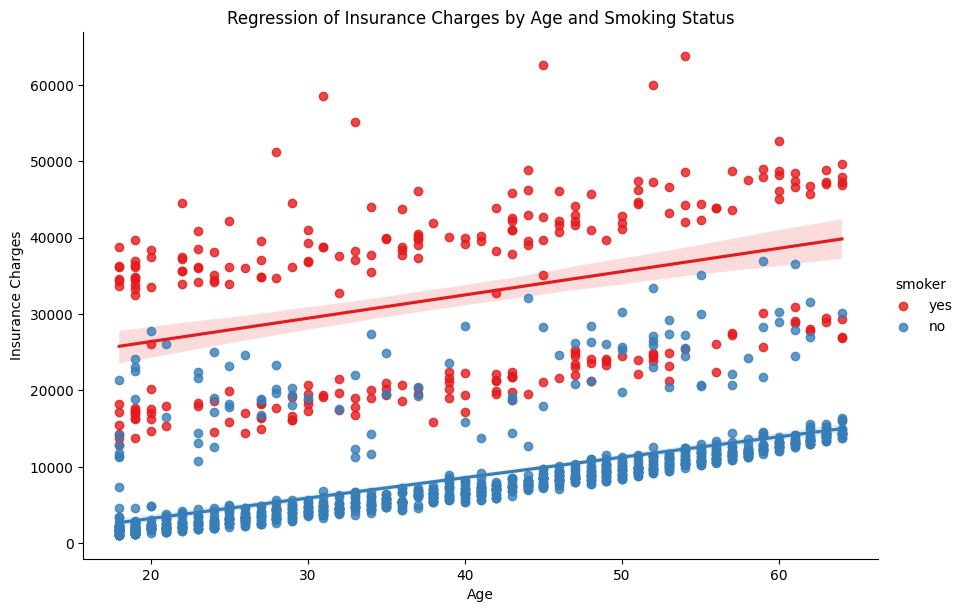

In [24]:
#regression chart for age vs. insurance charges, colored by smoking status
plt.figure(figsize=(10, 6))
sns.lmplot(x='age', y='charges', hue='smoker', data=data, palette='Set1', height=6, aspect=1.5)
plt.title('Regression of Insurance Charges by Age and Smoking Status')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()

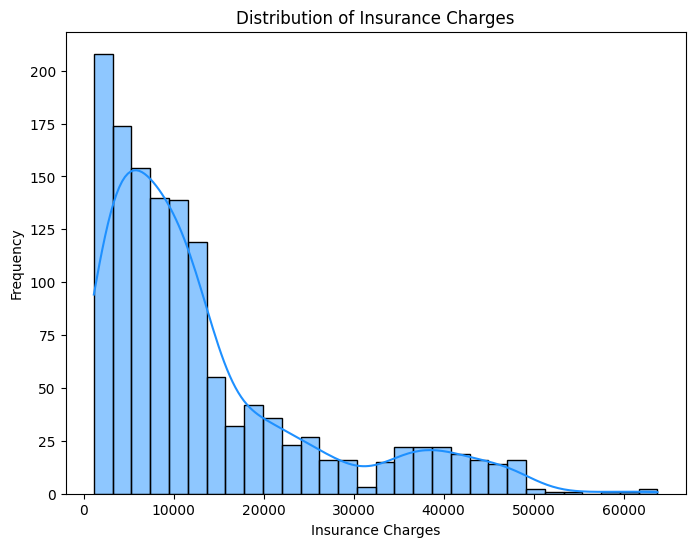

In [29]:
#histogram of insurance charges
plt.figure(figsize=(8, 6))
sns.histplot(data['charges'], bins=30, kde=True, color='dodgerblue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Insurance Charges')
plt.ylabel('Frequency')
plt.show()

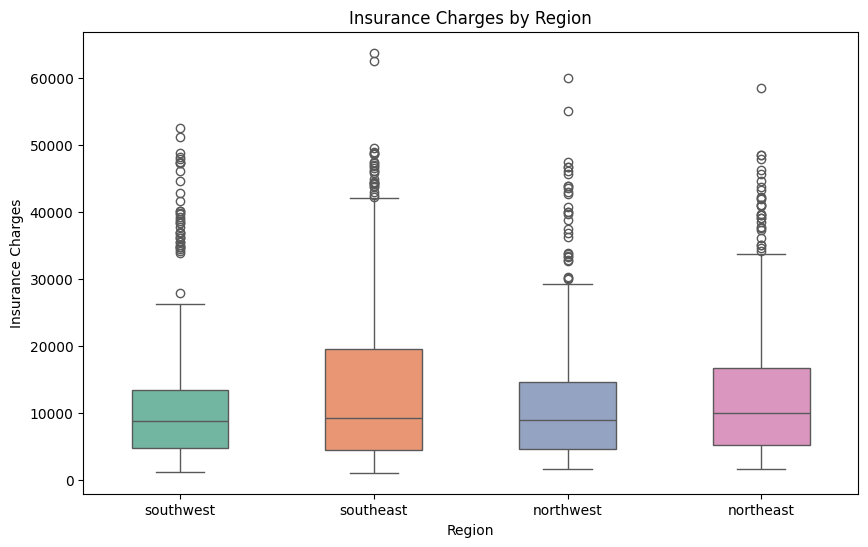

In [31]:
#box plot for insurance charges by different regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=data, hue='region', palette='Set2', dodge=False, width=0.5)
plt.title('Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Insurance Charges')
plt.legend([], [], frameon=False)  
plt.show()

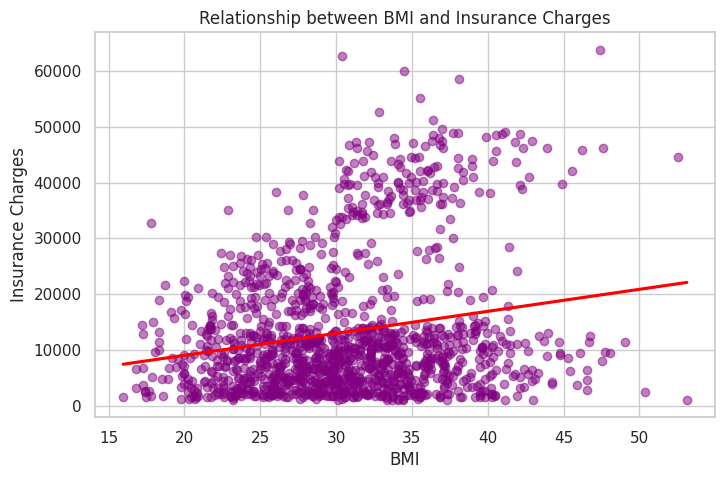

In [47]:
sns.set(style="whitegrid", font_scale=1.0)
plt.rcParams['font.family'] = 'DejaVu Sans'

plt.figure(figsize=(8, 5))
sns.regplot(x='bmi', y='charges', data=data, scatter_kws={'color': 'purple', 'alpha': 0.5}, 
            line_kws={'color': 'red', 'linestyle': '-'}, ci=None)

plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.title('Relationship between BMI and Insurance Charges')
plt.show()

#Mean Squared Error